# 8. 신경망/딥러닝의 응용 (필기체 숫자 인식)
- 필기체 숫자 (28*28 픽셀 그레이스케일 이미지) 피드 포워드 네트워크에 인식

## 8.1 MNIST 데이터베이스
- 필기체 숫자 데이터셋에 MNIST 데이터베이스 사용

In [19]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

- 60000개의 훈련용 데이터 (이미지, 라벨) ```x_train, y_train```에 저장
- 10000개의 테스트용 데이터 ```x_test, y_test```에 저장
- ```x_train```: 이미지 배열 (60000\*28\*28의 배열 변수)
- ```y_train```: 0~9의 정수


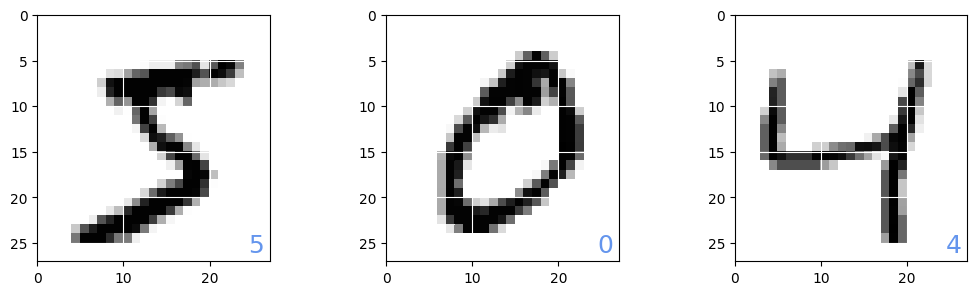

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id+1)
    img = x_train[id, :, :]
    plt.pcolor(255-img)
    plt.text(24.5, 26, "%d" %y_train[id], color="cornflowerblue", fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid("on", color="white")
plt.show()

## 8.2 2층 피드 포워드 네트워크 모델

In [21]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784) # (A) 60000*28*28을 60000*784의 배열로 변환
x_train = x_train.astype('float32') # (B) int를 float 형으로 변환
x_train = x_train / 255 # (C) 255로 나눔
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes) # (D) 1-of-K 부호화법으로 변경
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

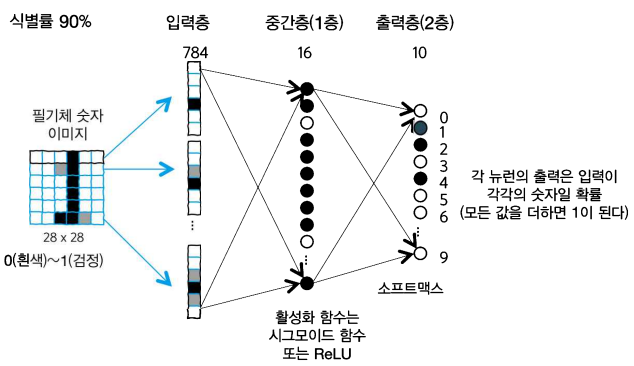
<br>
- 입력은 784차원 벡터
- 네트워크 출력층: 10개의 뉴런 (10개의 숫자 분류 위해)
- 활성화 함수로 소프트맥스 (출력값이 확률을 나타내도록)

In [22]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() # (A) 모델을 Sequential()로 정의
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B) 784차원 입력을 갖는 16개의 중간층
model.add(Dense(10, activation='softmax')) # (C) 10개의 출력층
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) # (D)알고리즘을 Adam으로 설정

In [23]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) # (A) verbose = 1 > 매 시기의 학습 평가치 표시
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 5ms/step - loss: 2.0591 - accuracy: 0.4116 - val_loss: 1.7779 - val_accuracy: 0.6608
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 1.6146 - accuracy: 0.7384 - val_loss: 1.4379 - val_accuracy: 0.7894
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 1.3199 - accuracy: 0.8058 - val_loss: 1.1806 - val_accuracy: 0.8336
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 1.0930 - accuracy: 0.8376 - val_loss: 0.9848 - val_accuracy: 0.8535
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.9226 - accuracy: 0.8552 - val_loss: 0.8401 - val_accuracy: 0.8669
Epoch 6/10
60/60 [==============================] - 1s 20ms/step - loss: 0.7965 - accuracy: 0.8665 - val_loss: 0.7325 - val_accuracy: 0.8757
Epoch 7/10
60/60 [==============================] - 0s 8ms/step - loss: 0.7026 - accuracy: 0.8741 - val_loss: 0.6519 - val_accuracy: 0.8825
Epoch 8/10
60/60 [=

- 확률적 경사 하강법: 데이터의 일부로 오차 함수의 기울기 계산
    - 1회 갱신에 사용하는 데이터 크기: ```batch_size```로 정의
    - 노이즈의 영향을 받는 것처럼 값이 튀면서 오차가 낮은 방향으로 나아감
- GD: local minimum에 빠지면 빠져나갈 수 X
- SGD: 값이 튀는 현상 때문에 local minimum을 빠져나갈 수 O

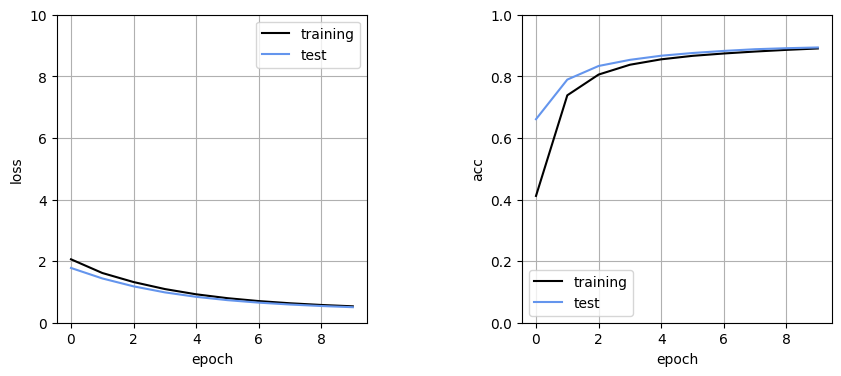

In [26]:
# 테스트 데이터 오차의 시간 변화

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="training", color="black")
plt.plot(history.history["val_loss"], label="test", color="cornflowerblue")
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="training", color="black")
plt.plot(history.history["val_accuracy"], label="test", color="cornflowerblue")
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()

- 테스트 데이터의 오차도 단조롭게 줄어들기에 오버피팅 X

313/313 [==============================] - 0s 782us/step


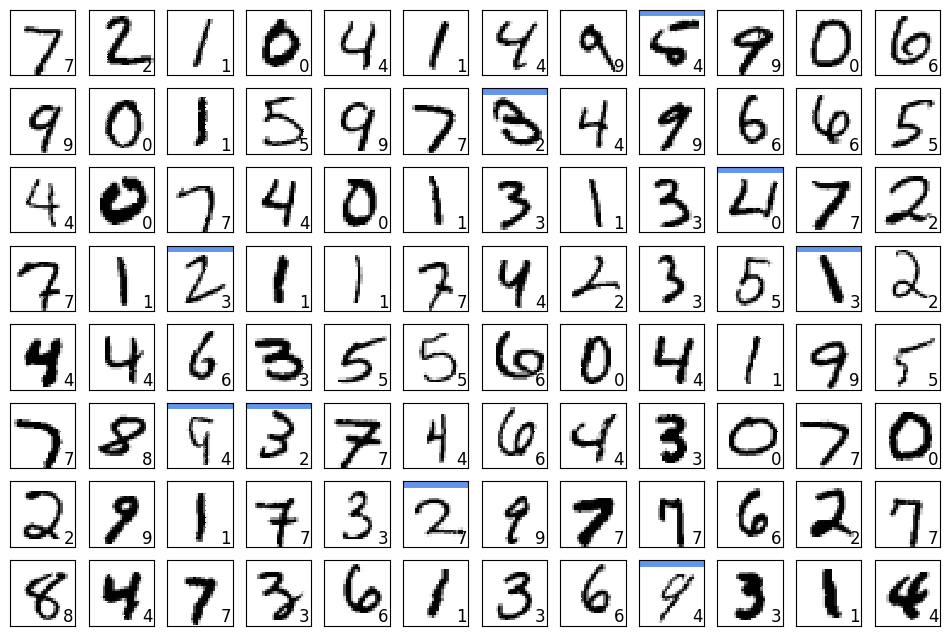

In [27]:
# 실제 테스트 데이터를 입력했을 때 모델의 출력

def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1-x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" %prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color="cornflowerblue", linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

# 메인
show_prediction()
plt.show()

## 8.3 ReLU 활성화 함수
- 시그모이드: 입력의 변화가 출력에 반영되기 어려움 (항상 0~1 사이로 매핑해서)
    - 오차 함수의 가중치 매개 변수에 대한 편미분 0에 가까워짐 > 경사 하강법의 학습이 늦어짐
- ReLU: 입력이 양수일 시 학습의 정체 문제 해결
- 프로그램에서 $\max(0, x)$로 나타낼 수 있어서 계산이 빠름

In [28]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() # (A) 모델을 Sequential()로 정의
model.add(Dense(16, input_dim=784, activation='relu')) # (B) 784차원 입력을 갖는 16개의 중간층
model.add(Dense(10, activation='softmax')) # (C) 10개의 출력층
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) # (D)알고리즘을 Adam으로 설정

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) # (A) verbose = 1 > 매 시기의 학습 평가치 표시
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 2s 18ms/step - loss: 1.4424 - accuracy: 0.5866 - val_loss: 0.8191 - val_accuracy: 0.8218
Epoch 2/10
60/60 [==============================] - 1s 12ms/step - loss: 0.6433 - accuracy: 0.8443 - val_loss: 0.4973 - val_accuracy: 0.8741
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 0.4616 - accuracy: 0.8780 - val_loss: 0.3988 - val_accuracy: 0.8945
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3881 - accuracy: 0.8960 - val_loss: 0.3495 - val_accuracy: 0.9075
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3456 - accuracy: 0.9060 - val_loss: 0.3176 - val_accuracy: 0.9148
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3179 - accuracy: 0.9134 - val_loss: 0.2978 - val_accuracy: 0.9197
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2979 - accuracy: 0.9177 - val_loss: 0.2825 - val_accuracy: 0.9225
Epoch 8/10
60/60 [

313/313 [==============================] - 0s 882us/step


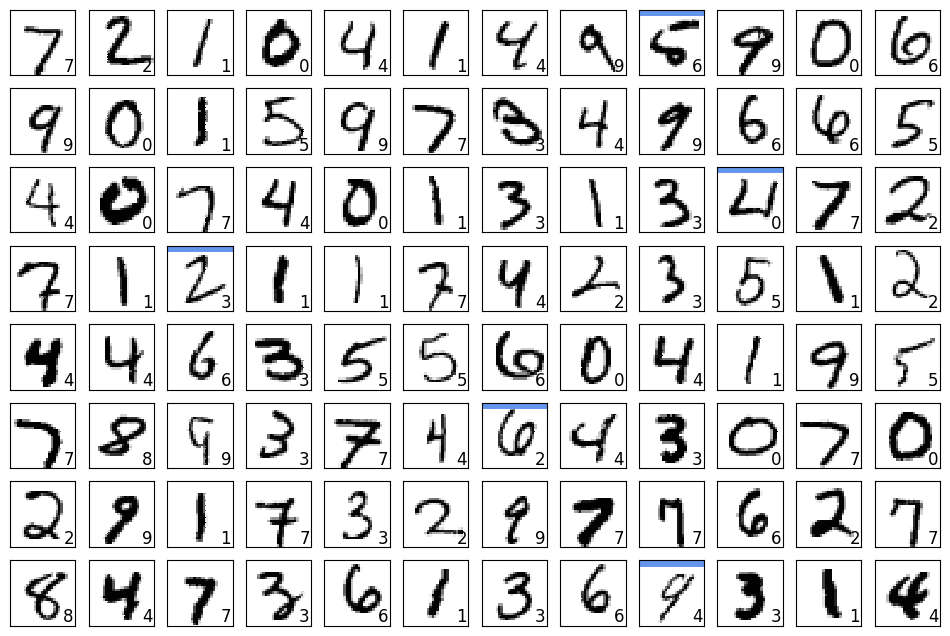

In [29]:
show_prediction()
plt.show()

- 중간층 가중치 매개 변수 ```model.layers[0].get_weights()[0]```
- 바이어스 매개 변수 ```model.layers[0].get_weights()[1]```
- 출력층의 매개 변수 ```layers[0]```을 ```layers[1]```로 변경

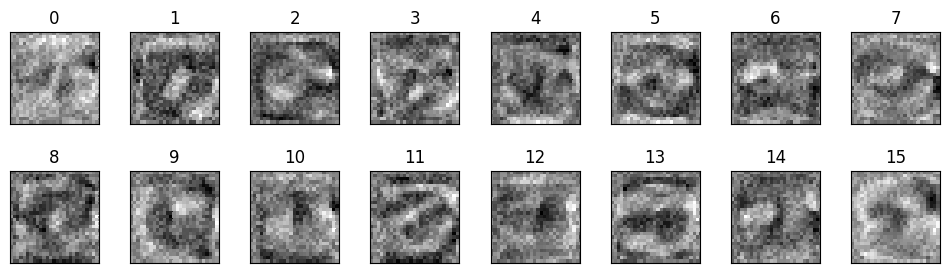

In [30]:
# 1층째의 가중치 시각화
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i+1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" %i)
plt.show()

- 가중치 값이 양수이면 검은색, 음수이면 흰색
- 학습에 의해 회극된 모습
- 검은 부분에 문자 일부분: 뉴런 활성화
- 흰 부분에 문자 일부분: 뉴런 억제

- 해당 모델은 2차원 이미지의 공간 정보 활용 X <br>
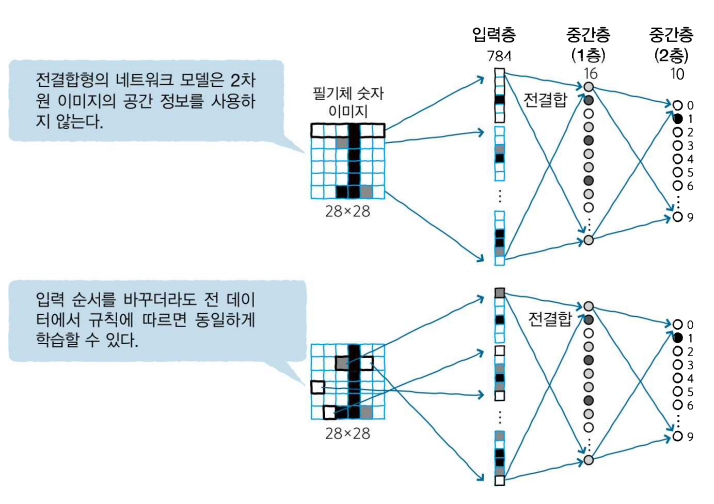

## 8.4 공간 필터
- 공간 정보: 직선, 곡선, 원형, 사각형 등의 모양을 나타내는 정보
- 공간 필터: 이러한 형태를 골라 내는 방법
- 필터는 2차원 행렬로 표시 <br>
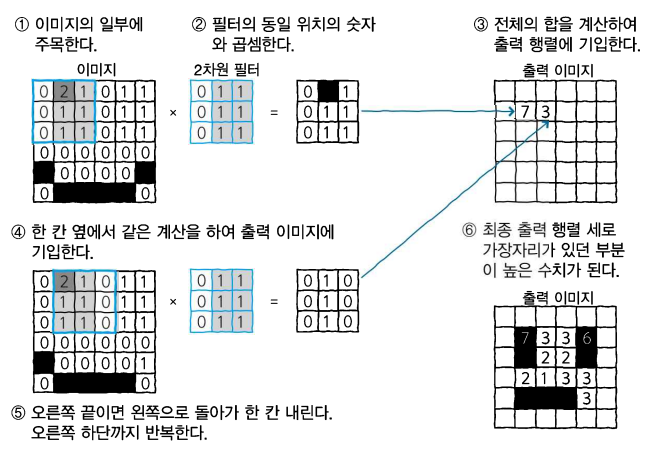

- 원본 이미지의 위치 $(i, j$의 픽셀 값 $x(i, j)$, 3×3 필터를 $h(i, j)$ <br>
- 합성곱 연산에서 얻어지는 값 $g(i, j)$는 다음과 같음
$$g(i, j)=\sum_{u=-1}^1\sum_{v=-1}^1x(i+u, j+v)h(u+1, v+1)$$
- 필터의 크기는 임의 결정 가능
    - 중심 결정 가능한 홀수 너비가 사용이 쉬움

In [31]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [32]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

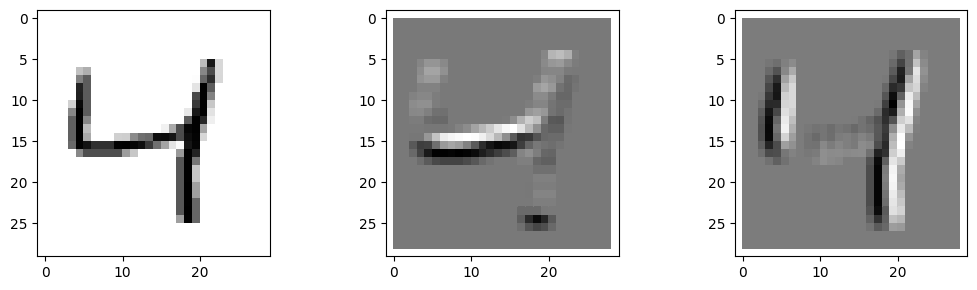

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1, 1, 1], [1, 1, 1], [-2, -2, -2]], dtype=float) # (A)
myfil2 = np.array([[-2, 1, 1], [-2, 1, 1], [-2, 1, 1]], dtype=float) # (B)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih+3, iw:iw+3]
        out_img1[ih+1, iw+1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih+1, iw+1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))

# ㅛ시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1-x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

- 가로와 세로의 엣지를 강조하는 필터 시험 (예제)
    - 대각선 엣지 강조, 이미지 스무딩, 세부 부분 강조 등 다양한 처리 가능
- 위 예제: 모든 요소를 합치면 0이 되도록 디자인
    - 공간 구조가 없는 균일한 부분: 0으로 변환
    - 필터에서 추출하려는 구조 존재: 0 이상의 값으로 변환
    - 0을 감지 레벨의 기준으로 세울 수 있어ㅓㅅ 편리함
- 필터 적용 시 출력 이미지 크기 작아짐
    - 연속으로 다양한 필터 적용 시 계속 작아지는 이미지
    - 대응책으로 패딩 존재

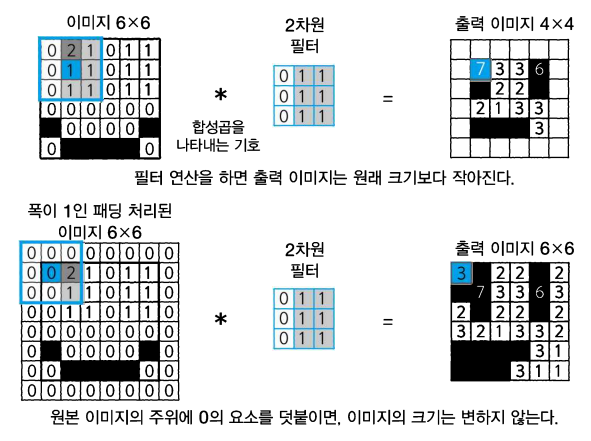
- 패딩: 필터 적용 전 0 등의 고정 요소로 주위 부풀려두기


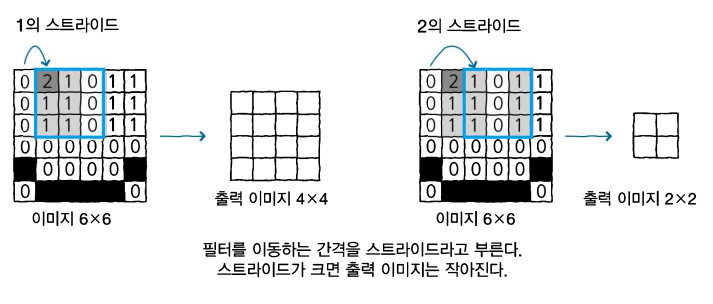
- 스트라이드: 이동 간격
    - 기존의 필터는 1칸씩 이동했지만, 이 이동 간격을 조정 가능
    - 스트라이드가 클 시 출력 이미지가 작아짐
- 패딩, 스트라이드 값: 합성곱 네트워크 사용 시 인수로 전달

## 8.5 합성곱 신경망
- 합성곱 신경망: 필터를 사용한 신경망 (CNN)
- CNN은 필터 자체를 학습시킴 <br>
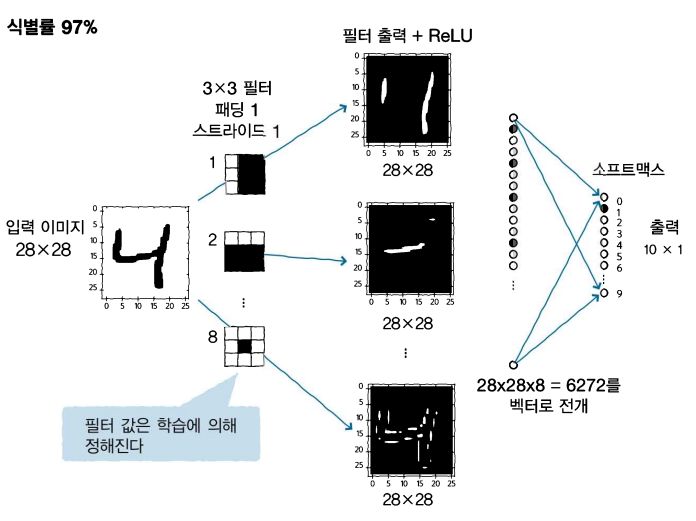
- 입력 이미지에 대해 크기 3*3, 패딩 1, 스트라이드 1의 필터 8장 적용
- 1장의 필터 출력 28\*28 배열 > 총 28\*28\*8의 3차원 배열
- 1차원으로 길이가 6272인 배열로 전개, 전결합으로 10개의 출력층 뉴런에 결합

In [34]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", input_shape=(28, 28, 1), activation="relu")) # (A) 합성곱층 모델에 추가
model.add(Flatten()) # (B) 합성곱층 출력 4차원 > Dens층 입력을 위한 2차원으로 변환
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 9s 145ms/step - loss: 0.7562 - accuracy: 0.8104 - val_loss: 0.3405 - val_accuracy: 0.9052
Epoch 2/20
60/60 [==============================] - 8s 135ms/step - loss: 0.3169 - accuracy: 0.9090 - val_loss: 0.2772 - val_accuracy: 0.9216
Epoch 3/20
60/60 [==============================] - 9s 145ms/step - loss: 0.2722 - accuracy: 0.9230 - val_loss: 0.2476 - val_accuracy: 0.9302
Epoch 4/20
60/60 [==============================] - 9s 145ms/step - loss: 0.2425 - accuracy: 0.9319 - val_loss: 0.2266 - val_accuracy: 0.9369
Epoch 5/20
60/60 [==============================] - 8s 131ms/step - loss: 0.2145 - accuracy: 0.9400 - val_loss: 0.1988 - val_accuracy: 0.9452
Epoch 6/20
60/60 [==============================] - 11s 191ms/step - loss: 0.1886 - accuracy: 0.9476 - val_loss: 0.1787 - val_accuracy: 0.9515
Epoch 7/20
60/60 [==============================] - 9s 145ms/step - loss: 0.1646 - accuracy: 0.9550 - val_loss: 0.1575 - val_accuracy: 0.9574
Epoch

313/313 [==============================] - 1s 4ms/step


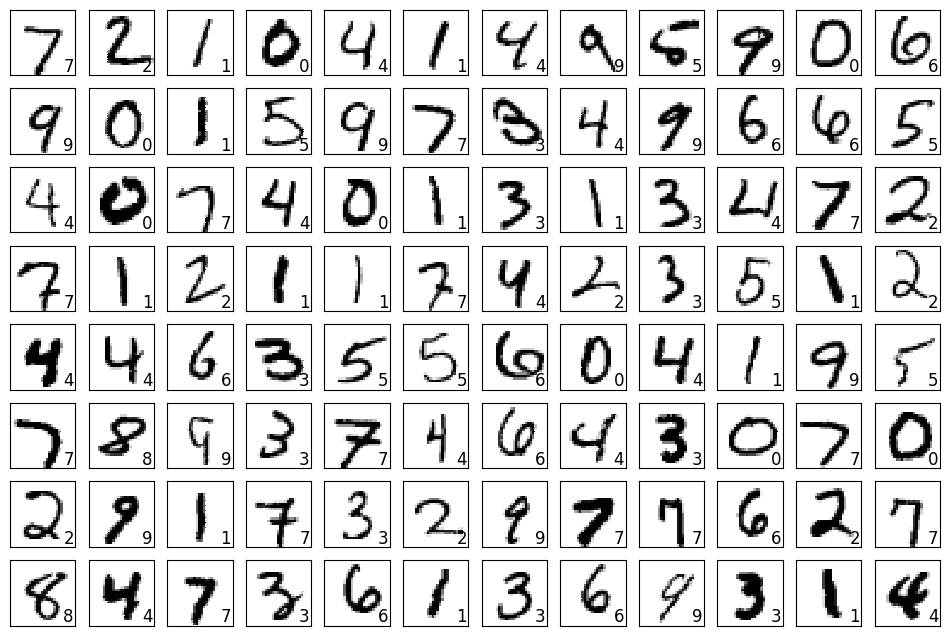

In [35]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1-x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" %prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color="cornflowerblue", linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

show_prediction()
plt.show()

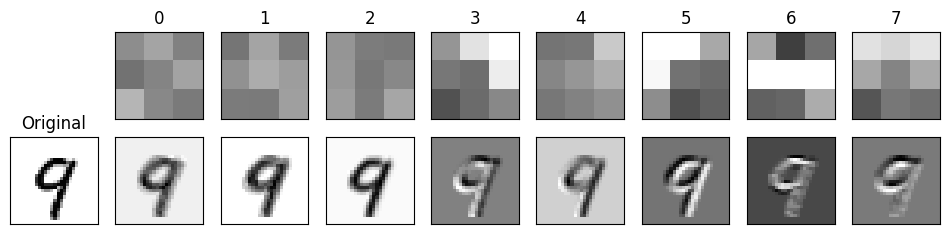

In [37]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")
w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i+2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" %i)
    plt.subplot(2, 9, i+11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih+3, iw:iw+3]
            out_img[ih+1, iw+1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

- 2번 필터: 가로줄의 아래쪽 엣지 강조
- 7번 필터: 가로줄의 위쪽 엣지 강조

## 8.6 풀링

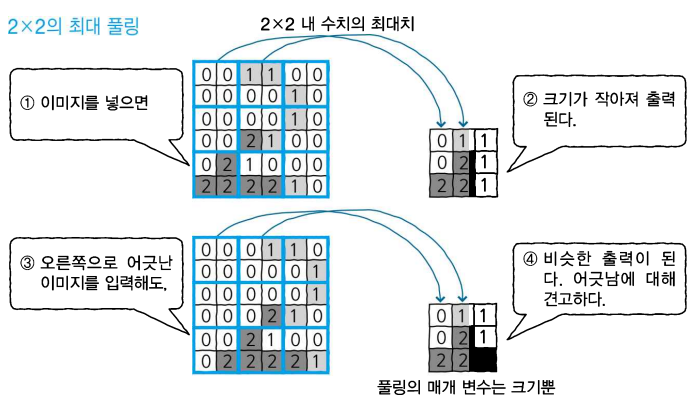
- 출력 이미지: 입력 이미지가 가로 세로가 어긋나도 거의 변함 X
    - 위치만 어긋난 이미지에 비슷한 출력 반환 가능
- 평균 풀링: 작은 영역의 수치의 평균을 출력값으로 함
- 스트라이드는 작은 공간의 크기와 같은 크기로 하는 경우가 많음

## 8.7 드롭아웃

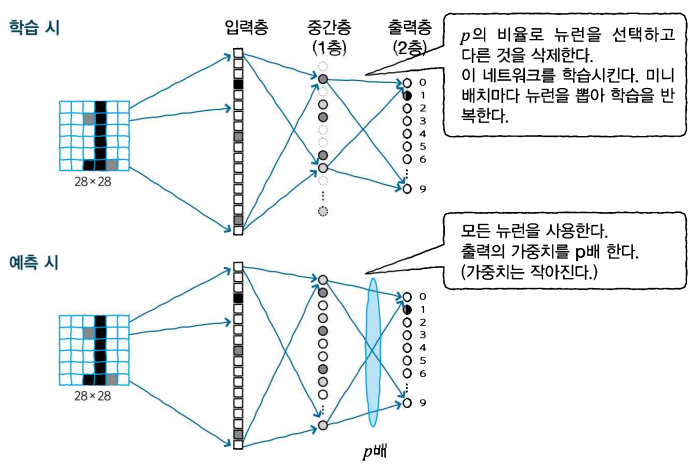

**학습 시**
- 입력층의 유닛과 중간층 뉴런을 확률 $p(p<1)$로 임의로 선택, 나머지 무효화
- 무효화된 뉴런은 존재하지 않는 것으로 하여 학습 갱신
- 미니 배치마다 뉴런을 뽑아 해당 절차 방법

**예측 시**
- 모든 뉴런 사용
- 학습에는 $p$의 비율의 뉴런 존재, 예측 시 전체 참가가 되면 출력이 커짐 ($1/p$배)
- 드롭아웃을 한 층의 출력 대상의 가중치를 $p$배 > 작게 설정해서 계산을 맞춤

- 여러 네트워크를 각각 학습시켜 예측 시 네트워크를 평균화해 합치는 효과

## 8.8 MNIST 인식 네트워크 모델
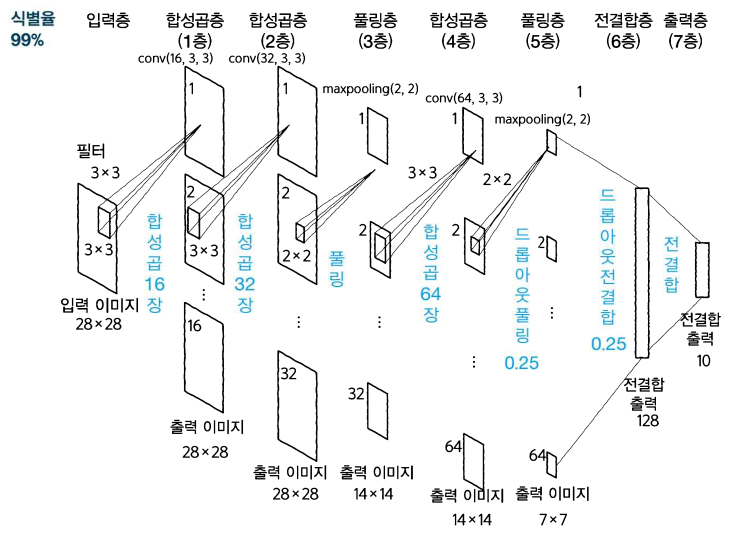

- 1층, 2층에서 합성곱층 연속
    - 1층째의 합성곱층 16장의 필터 > 출력 28*28의 이미지 16장
    - 28\*28\*16의 3차원 배열의 데이터로 간주
- 2층의 합성곱은 3차원 배열 데이터에 대해 수행
    - 3*3 1장의 필터 > 실질적 3\*3\*16의 배열로 정의
    - 출력 28\*28\*16의 블록
    - 16의 깊이분에 별도의 필터 할당, 독립적 처리
    - 3\*3\*16의 크기를 가지는 필터: 두 번째 레이어의 합성곱층
    - 필터 정의하는 매개 변수 수: (바이어스 제외) 3\*3\*16\*32
- 3층(2\*2 맥스 풀링): 14\*14 이미지로 줄어듦
- 4층(합성곱층): 필터 수 64장 > 매개 변수 수 3\*3\*32\*64
- 5층(맥스 풀링+드롭아웃): 이미지 크기 7\*7
- 6층(드롭아웃): 128개의 전결합
- 7층: 출력이 10개인 전결합층

In [38]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A) 최대 풀링층 추가
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B) 최대 풀링층 추가
model.add(Dropout(0.25)) # (C) 드롭아웃층 추가, 남은 뉴런의 비율 0.25
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25)) # (D) 드롭아웃층 추가, 남은 뉴런의 비율 0.25
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 72s 1s/step - loss: 0.7276 - accuracy: 0.7750 - val_loss: 0.1447 - val_accuracy: 0.9559
Epoch 2/20
60/60 [==============================] - 66s 1s/step - loss: 0.1512 - accuracy: 0.9540 - val_loss: 0.0710 - val_accuracy: 0.9766
Epoch 3/20
60/60 [==============================] - 54s 903ms/step - loss: 0.0982 - accuracy: 0.9701 - val_loss: 0.0479 - val_accuracy: 0.9836
Epoch 4/20
60/60 [==============================] - 56s 934ms/step - loss: 0.0735 - accuracy: 0.9772 - val_loss: 0.0399 - val_accuracy: 0.9861
Epoch 5/20
60/60 [==============================] - 55s 912ms/step - loss: 0.0615 - accuracy: 0.9807 - val_loss: 0.0339 - val_accuracy: 0.9885
Epoch 6/20
60/60 [==============================] - 55s 916ms/step - loss: 0.0525 - accuracy: 0.9838 - val_loss: 0.0322 - val_accuracy: 0.9884
Epoch 7/20
60/60 [==============================] - 55s 916ms/step - loss: 0.0468 - accuracy: 0.9850 - val_loss: 0.0307 - val_accuracy: 0.9885
Epoch

313/313 [==============================] - 3s 10ms/step


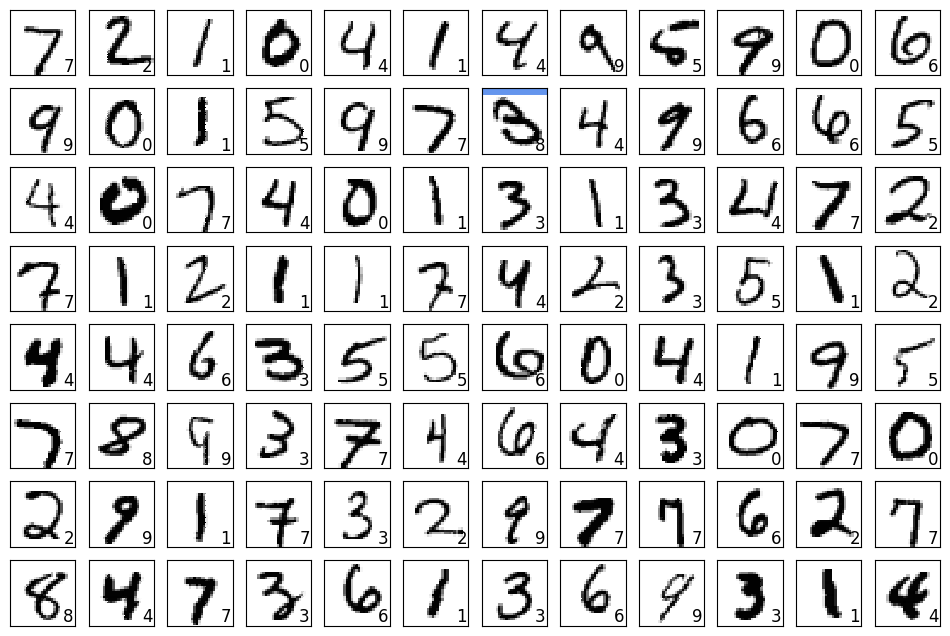

In [40]:
show_prediction()
plt.show()

- MNIST 데이터보다 더 큰 자연 이미지 처리 or 많은 카테고리를 다루는 경우 > 층의 심층화, 합성곱, 풀링, 드롭아웃 효과 더욱 강력해질 것